# <center>Projeto de Insights - House Rocket</center>

<center><img src="house_rocket.jpg" style="height: 387.8px; width:600.0px;"/></center>

## 1. Questão de negócio

### 1.1. Sobre a empresa
<p style="text-align: justify">A House Rocket é uma empresa digital fictícia de empreendimentos imobiliários. Seu modelo de negócios se define por encontrar oportunidades de compra e venda de imóveis no estado de Washington, EUA, através de tecnologia. A principal estratégia da companhia é a compra de imóveis com ótima localização e preços baixos para então revendê-los a preços com altas margens de lucro, passando em vezes por processos de renovações.</p>

### 1.2. Sobre o projeto
<p style="text-align: justify">Ao se analizar uma propriedade, observa-se vários atributos tais como área total construída, números de quartos, banheiros e andares, anos de construção e reforma, código postais e outros. Tais informações tornam as propriedades mais ou menos atrativas a compradores e seus donos e, levando em conta também a sazonalidade, impactam de maneira significante seus preços.</p>
<p style="text-align: justify">Assim, o objetivo deste projeto é fornecer aos parceiros de negócio as respostas a duas questões chave:</p>

> - Quais imóveis deveriam ser compradas pela House Rocket?
> - Quando e por qual preço os imóveis devem ser postos à venda?


### 1.3. Visão geral do conjunto de dados
#### Conjunto de dados bruto
<p style="text-align: justify">O conjunto de dados bruto, ou seja, que não foi modificado por nenhum processo de limpeza e sem ação de nenhuma premissa, possui 21613 linhas e 21 colunas.</p>

Estas 21 colunas são descritas abaixo:

| **Coluna**        | Descrição                                                                                                                             |
|:-------------------|:---------------------------------------------------------------------------------------------------------------------------------------|
| **id**            | Código único identificador do imóvel vendido                                                                                                 |
| **date**          | Data de venda do imóvel                                                                                                |
| **price**         | Preço de venda da propriedade                                                                                                                  |
| **bedrooms**      | Número de quartos                                                                                                                     |
| **bathrooms**     | Número de banheiros                                                                                                                   |
| **sqft_living**   | Área, em pés quadrados, de área construída                                                                                            |
| **sqft_lot**      | Área, em pés quadrados, de área do lote                                                                                               |
| **floors**        | Número de andares                                                                                                                     |
| **waterfront**    | Vista para água. Caso o valor seja 1, o imóvel possui vista para a costa. O valor 0 indica que o imóvel não possui vista para a costa |
| **view**          | Condição de vista do imóvel. 4 indica excelente; 3 indica ótimo; 2 indica regular; 1 indica ruim; 0 indica péssima                                                                                                                                   |
| **condition**     | Condição do imóvel. 5 excelente. 4 boa; 3 regular; 2 ruim; 1 péssima                                                          |
| **grade**         | Índice de 1 a 13, onde 1-3 peca em construção e design; 7 possui um nível médio de construção e design; 11-13 possui alta qualidade de construção e design                                                                                    |
| **sqft_above**    | Área, em pés quadrados, dos andares a partir do térreo |
| **sqft_basement** | Área, em pés quadrados, do porão, caso haja                                                                                         |
| **yr_built**      | Ano de construção do imóvel                                                                                                           |
| **yr_renovated**  | Ano da última reforma do imóvel, caso haja                                                                                                   |
| **zipcode**       | Código postal                                                                                                                         |
| **lat**           | Latitude, em graus                                                                                                                    |
| **long**          | Longitude, em graus                                                                                                                   |
| **sqft_living15** | Área, em pés quadrados, da área construída dos 15 vizinhos mais próximos                                                                                                           |
| **sqft_lot15**    | Área, em pés quadrados, da área total dos 15 vizinhos mais próximos                                                                                                           |

## 2. Premissas do negócio
<p style="text-align: justify">Para a elaboração deste trabalho, as seguintes premissas são adotadas:</p>

- O conjunto de dados não possui linhas com dados faltantes (NaN, '-' ou similares);
- A coluna 'bathrooms' possui valores decimais, porque é considerado que "3/4 de banheiro" é um cômodo que não possui ou chuveiro ou banheira, sendo assim um banheiro recebe valor 1 quando possui pia, vaso sanitário, chuveiro e banheira. Neste trabalho serão considerados todos os banheiros como completos, e por isso os valores serão arredondados para o próximo valor inteiro;
- Semelhante à coluna 'bathrooms', a coluna 'floors' possui valores decimais. A mesma abordagem de arredondamento para o próximo valor inteiro será adotada;
- Apartamentos que possuírem valores zerados para número de quartos e banheiros serão excluídos.


## 3. Planejamento da solução
### 3.1 O método SAPE (Saída - Processo - Entrada)
#### Saída (Produto final)
Serão fornecidos dois relatórios:

- Relatório com as sugestões de compra de imóveis por um valor recomendado;
- Relatório com as sugestões de venda de imóveis por um valor recomendado.
    
Ambos os relatórios estarão presentes em um único dashboard do Streamlit contendo:

- Tabela com informações sobre os imóveis e recomendação de compra e venda;
- Tabela com preços médios por código postal;
- Tabela com estatísticas descritivas das recomendações de compra e venda;
- Mapas descrevendo as densidades do portfólio e dos preços;
- Gráficos plotando os preços médios por anos e dias, ao longo da série histórica das listas de compra e venda;
- Histograma da distribuição dos preços de compra e venda;
- Gráficos com os atributos físicos dos imóveis, sendo quartos, banheiros, andares e presença ou não do imóvel à costa.

Os relatórios terão filtros para exploração dos dados.

#### Processo (Passo-a-passo)
<strong>1. Extração dos dados (Extraction)</strong>
- Carregar o conjunto de dados bruto com a biblioteca pandas e armazenar em uma variável;

<strong>2. Transformação dos dados (Transformation)</strong>

2.1. Limpeza dos dados

- Conferir os dados faltantes da base de dados e excluir as linhas (PREMISSA);
- Conferir dados zerados nas colunas de andares, quartos e banheiros e excluí-los (PREMISSA);
- Arredondar os valores das colunas 'bathrooms' e 'floors' para o próximo valor inteiro (PREMISSA);
- Conferir os tipos das colunas e, se necessário, alterá-los;
- Cálcular os outliers;
- Excluir os outliers (PREMISSA)

2.2. Criação de novas colunas

- Criar novas colunas convertendo pés quadrados em metros quadrados;
- Criar nova coluna com a condição dos imóveis em texto (boa, regular e ruim);
- Criar nova coluna com a estação do ano do imóvel.


2.3. Seção de compra

2.3.1. Construção de tabela de compra

- Agrupar os dados por região;
- Dentro de cada região, encontrar a mediana do preço dos imóveis;
- Criar nova coluna e nela sugerir que os imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições sejam comprados.


2.4. Seção de venda

2.4.1. Construção de tabela de venda

- Agrupar os imóveis por região (zipcode) e por sazonalidade (estações do ano);
- Dentro de cada região e sazonalidade, calcular a mediana de preços;
- Criar nova coluna com as condições de venda:

    - Se o preço da compra for maior que a mediana da região+sazonalidade:<br/>
      O preço da venda será igual ao preço da compra + 10%.
    - Se o preço da compra for menor que a mediana da região+sazonalidade:<br/>
      O preço da venda será igual ao preço da compra + 30%.


2.5. Construção do dashboard

2.5.1. Tabelas
- Inserir as tabelas de compra e venda desenvolvidas anteriormente no dashboard;
- Calcular o preço médio dos imóveis de cada tabela;
- Criar tabela de estatísticas descritivas para os imóveis de compra e venda.

2.5.2. Mapas
- Criar mapa com a densidade de portfólio;
- Criar mapa com a densidade de preços.

2.5.3. Gráficos
- Atributos comerciais:
    - Evolução dos preços ano a ano;
    - Evolução dos preços dia a dia;
    - Histograma de preços.
    
- Atributos físicos:
    - Distribuição de número de quartos;
    - Distribuição de número de banheiros;
    - Distribuição de número andares;
    - Distribuição de vista para costa.

<strong>3. Carregamento dos dados (Loading)</strong>

3.1. Validação de hipóteses

- <strong>H1</strong>: Imóveis que possuem vista para água são em média 30% mais caros;
- <strong>H2</strong>: Imóveis com data de construção menor que 1957 são em média 50% mais baratos;
- <strong>H3</strong>: Imóveis sem porão possuem em média área total 40% maior;
- <strong>H4</strong>: O crescimento do preço dos imóveis Year over Year (YoY) é de 10%;
- <strong>H5</strong>: Imóveis com 3 banheiros têm um crescimento Month over Month (MoM) de 15%;
- <strong>H6</strong>: Imóveis com reformas são em média 20% mais caros;
- <strong>H7</strong>: Imóveis com condição 3 são em média 40% mais caros que os imóveis com condição 1;
- <strong>H8</strong>: Imóveis com até 2 quartos são em média 10% mais baratos ;
- <strong>H9</strong>: Imóveis com porão são em média 5% mais caros;
- <strong>H10</strong>: Imóveis são vendidos no verão por um preço médio 15% maior que no inverno.

3.2. Avaliação de insights para o negócio

#### Entrada
- Os dados deste projeto foram retirados do portal Kaggle e estão disponíveis no link:
    
    [https://www.kaggle.com/datasets/harlfoxem/housesalesprediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)



## 4. Os principais insights
<p style="text-align: justify">A análise exploratória dos dados das propriedades disponíveis para compra e revenda pela House Rocket proporciona alguns insights:</p>

### Insight 1: Imóveis com vista para a água
<p style="text-align: justify">O valor de mercado dos imóveis é fortemente influenciado pela sua localização, principalmente em relação à proximidade a grandes corpos d'água. Neste portfólio, as propriedades situadas à beira dos lagos presentes na região de Seattle, WA apresentam um preço médio 214% maior que aquelas situadas distante das costas.</p>

### Insight 2: Imóveis que foram reformados
<p style="text-align: justify">Reformas elevam consideravelmente o preço dos imóveis do portfólio analisado. Comparadas àquelas que não passaram por nenhum processo de renovação, as propriedades reformadas possuem preço em média 40% maiores.</p>

### Insight 3: Idade de construção dos imóveis
<p style="text-align: justify">Foram analisadas as idades dos imóveis. A diferença entre o preço médio dos imóveis que foram constrídos antes e depois de 1957 (a mediana dos valores dos anos de contrução, que vão de 1900 a 2015) é de apenas 2.83%. Assim, esta variável não é significante comparada à influência dos outros atributos do conjunto de dados.</p>

### Insight 4: Título do Insight 4
<p style="text-align: justify">Descrição do insight 4.</p>

### Insight 5: Título do Insight 5
<p style="text-align: justify">Descrição do insight 5.</p>


## 5. Resultados financeiros para o negócio
<p style="text-align: justify">A partir das considerações sobre os imóveis, levando em conta as condições físicas, estação de compra e atributos físicos, são obtidos <strong>3872</strong> propriedades recomendadas para compra. As somas dos preços de compra e venda, além como o <strong>faturamento total</strong> possível estão descritos na tabela abaixo: </p>

| Número de imóveis | Preço de compra total | Preço de venda total | Faturamento total |
|:-----------------:|:---------------------:|:--------------------:|:-----------------:|
|       3872        | \$1.522.626.895,00    | \$1.959.734.476,70   | \$437.107.581,70  |

<p style="text-align: justify">Evidentemente, devido à provável impossibilidade de adquirir todos os imóveis sugeridos imediatamente, devem ser levadas em conta fatores como localização, tamanho dos imóveis, recursos financeiros disponíveis e outros para diversificação do portfólio.</p>

## 6. Conclusão
<p style="text-align: justify">Este documento provê uma análise exploratória de um conjunto de dados de imóveis disponíveis para a compra. Por meio de uma empresa fictícia com modelo de negócio bem definido, foi possível apresentar um processo completo de limpeza, carregamento e transformação de dados. O conjunto bruto foi explicado, foram propostas premissas sobre os dados e, assim, os imóveis foram categorizados em "Comprar" ou "Não comprar". Para ajudar o público final deste estudo na análise e visualização das propriedades, foram desenvolvidos dois dashboards com tabelas, mapas e gráficos. Por fim, este documento trouxe os resultados financeiros para o negócio, apresentando o faturamento máximo do portfólio de imóveis.</p>

## 7. Próximos passos
<p style="text-align: justify">Este projeto pode ir além nas análises e visualizações já aqui desenvolvidas, incluindo intens como:</p>

>- Inclusão de banheiros considerados decimais (como 3/4 de banheiro sendo um lavatório que não possui chuveiro ou banheiro), que foram arredondados como premissa neste trabalho;<br/>
>- Refinamento do preço de venda dos imóveis, levando em conta não apenas o preço médio por região e a sazonalidade, mas também atributos físicos das propriedades;<br/>
>- Análise e sugestão de renovações nos imóveis para ampliação do portfólio da empresa.

## 8. Tecnologias
### Desenvolvimento do código


[<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" style="height: 50px" align="left"/>](https://jupyter.org/)


[<img src="https://upload.wikimedia.org/wikipedia/commons/1/1d/PyCharm_Icon.svg" style="height: 50px" align="left"/>](https://www.jetbrains.com/pt-br/pycharm/)


[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" style="height: 50px" align="left"/>](https://pandas.pydata.org/)


[<img src="https://geopandas.org/en/latest/_images/geopandas_logo.png" style="height: 40px" align="left"/>](https://geopandas.org/en/stable/)<br/><br/><br/>


### Construção e publicação dos dashboards
[comment]: <> (Streamlit)
[<img src="https://streamlit.io/images/brand/streamlit-logo-secondary-colormark-darktext.svg" style="height: 50px" align="left"/>](https://streamlit.io/)

[comment]: <> (Heroku)
[<img src="https://blog.back4app.com/wp-content/uploads/2020/12/O-que-e-o-Heroku.png" style="height: 50px" align="left"/>](http://heroku.com)<br/>

In [ ]:
# [![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)](https://jupyter.org/)
# [![PyCharm](https://img.shields.io/badge/pycharm-143?style=for-the-badge&logo=pycharm&logoColor=black&color=black&labelColor=green)](https://www.jetbrains.com/pt-br/pycharm/)

# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import datetime


pd.options.display.float_format = '{:,.4f}'.format

# 1. Extração dos dados (Extraction)
# - Carregar o conjunto de dados bruto com a biblioteca pandas e armazenar em uma variável;
data = pd.read_csv('kc_house_data.csv')

# 2. Transformação dos dados (Transformation)
# 2.1. Limpeza de dados
# - Conferir os dados faltantes da base de dados e excluir as linhas;
print('='*80)
print('Conferência de dados nulos\n')
print(data.info())
print('\nNão há dados nulos\n')

# - Conferir dados zerados nas colunas de andares, quartos e banheiros e excluí-los;
print('='*80)
print('Conferência de colunas com dados zerados que devem ser excluídos\n')
for i in data.columns:
    if (data[i] == 0).sum() != 0:
        print(f'{i}: {(data[i] == 0).sum()}')
print("\nHá dados nulos nas colunas 'bedrooms' e 'bathrooms' que devem ser excluídos\n")

    # Excluindo valores zerados
print('Excluindo valores zerados')
data = data[(data['bathrooms'] != 0) & (data['bedrooms'] != 0)]
print('Tamanho do dataframe após limpeza:', data.shape, '\n')

# - Arredondar os valores das colunas 'bathrooms' e 'floors' para o próximo valor inteiro
print('='*80)
print("Arredondando os valores das colunas 'bathrooms' e 'floors' para o próximo valor inteiro\n")
print(f"Valores únicos das colunas:\n'bathrooms': {data['bathrooms'].unique()}\n'floors': {data['floors'].unique()}")
data['bathrooms'] = data['bathrooms'].apply(np.ceil)
data['floors'] = data['floors'].apply(np.ceil)
print(f"\nValores únicos das colunas após transformação:\n'bathrooms': {data['bathrooms'].unique()}\n'floors': {data['floors'].unique()}", "\n")

# - Conferir os tipos das colunas e, se necessário, alterá-los.
print('='*80)
print('Conferindo os tipos das colunas\n')
print(data.dtypes)

    # Convertendo date para datetime
data['date'] = pd.to_datetime(data['date'])

    # Convertendo bathrooms para int
data['bathrooms'] = data['bathrooms'].astype(dtype='int64')

    # Convertendo floors para int
data['floors'] = data['floors'].astype(dtype='int64')
print('\nConferindo os novos tipos das colunas que foram alteradas\n')
print(data[['date', 'bathrooms', 'floors']].dtypes, '\n')

# 2.2. Criação de novas colunas
# - Criando novas colunas convertendo pés quadrados em metros quadrados
# print('='*80)
data['m2_living'] = data['sqft_living'].apply(lambda x: x/10.7639).astype(dtype='int64')
data['m2_lot'] = data['sqft_lot'].apply(lambda x: x/10.7639).astype(dtype='int64')
data['m2_above'] = data['sqft_above'].apply(lambda x: x/10.7639).astype(dtype='int64')
data['m2_basement'] = data['sqft_basement'].apply(lambda x: x/10.7639).astype(dtype='int64')
data['m2_living15'] = data['sqft_living15'].apply(lambda x: x/10.7639).astype(dtype='int64')
data['m2_lot15'] = data['sqft_lot15'].apply(lambda x: x/10.7639).astype(dtype='int64')

# - Criando nova coluna com a condição dos imóveis em texto (boa, regular e ruim)
# print('='*80)
data['condition_description'] = data['condition'].apply(lambda x: 'excellent' if x == 5 else
                                                                  'good' if x == 4 else
                                                                  'fair' if x == 3 else
                                                                  'poor' if x == 2 else
                                                                  'bad')

# - Criando nova coluna com a estação do ano do imóvel
# "day of year" ranges for the northern hemisphere
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter for anyone else

data['season'] = data['date'].apply(lambda x: 'spring' if x.timetuple().tm_yday in spring else
                                              'summer' if x.timetuple().tm_yday in summer else
                                              'fall' if x.timetuple().tm_yday in fall else
                                              'winter')

# 2.3. Seção de compras
# 2.3.1. Construção da tabela de compras
# - Calculando a mediana dos preços de cada zipcode
    # Agrupando os zipcodes e calculando as medianas dos preços
df_median = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df_median.columns = ['zipcode', 'price_median']
    
    # Criando coluna price_median para cada imóvel com base no zipcode
data = pd.merge(data, df_median, on='zipcode', how='inner')

# - Criando a coluna de compra
data_compra = pd.DataFrame()
data_compra[['id', 'zipcode', 'price', 'price_median', 'condition', 'condition_description']] = data[['id', 'zipcode', 'price', 'price_median', 'condition', 'condition_description']]

for i in range(len(data_compra)):
    if (data_compra.loc[i, 'price'] < data_compra.loc[i, 'price_median']) & (data_compra.loc[i, 'condition'] >= 4):
        data_compra.loc[i, 'status'] = 'Buy'
    else:
        data_compra.loc[i, 'status'] = 'Do not buy'


        
# 2.4. Seção de vendas
# 2.4.1. Construção da tabela de compras
# - Calculando a mediana dos preços de cada zipcode e sazonalidade
    # Agrupando os zipcodes e estações calculando as medianas dos preços
df_median_season = data[['zipcode', 'season', 'price']].groupby(['zipcode', 'season']).median().reset_index()
df_median_season.columns = ['zipcode', 'season', 'price_median_season']

    # Criando coluna price_median para cada imóvel com base no zipcode
data = pd.merge(data, data_compra[['id', 'status']], on='id', how='inner')
data = pd.merge(data, df_median_season, on=['zipcode', 'season'], how='inner')

# - Criando a coluna de venda
data_venda = pd.DataFrame()
data_venda[['id', 'zipcode', 'season', 'price', 'price_median', 'condition', 'condition_description', 'status']] = data[['id', 'zipcode', 'season', 'price', 'price_median_season', 'condition', 'condition_description', 'status']]
data_venda = data_venda[data_venda['status'] == 'Buy'].reset_index(drop=True)

for i in range(len(data_venda)):
    if data_venda.loc[i, 'price'] < data_venda.loc[i, 'price_median']:
        data_venda.loc[i, 'sell_price'] = data_venda.loc[i, 'price'] * 1.3
    else:
        data_venda.loc[i, 'sell_price'] = data_venda.loc[i, 'price'] * 1.1
        
    data_venda.loc[i, 'gain'] = data_venda.loc[i, 'sell_price'] - data_venda.loc[i, 'price']

Conferência de dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 n

In [4]:
df = pd.merge(data, data_compra[['id', 'status']], on='id', how='inner')

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,m2_above,m2_basement,m2_living15,m2_lot15,condition_description,season,price_median,status_x,price_median_season,status_y
0,7129300520,2014-10-13,"221,900.0000",3,1,1180,5650,1,0,0,...,109,0,124,524,fair,fall,"278,277.0000",Do not buy,"284,000.0000",Do not buy
1,2976800796,2014-09-25,"236,000.0000",3,1,1300,5898,1,0,0,...,120,0,122,707,fair,fall,"278,277.0000",Do not buy,"284,000.0000",Do not buy
2,3352402236,2014-12-15,"252,500.0000",3,2,1150,6000,1,0,0,...,106,0,183,590,excellent,fall,"278,277.0000",Buy,"284,000.0000",Buy
3,1180002378,2014-09-26,"299,000.0000",4,3,1950,3000,2,0,0,...,181,0,108,557,fair,fall,"278,277.0000",Do not buy,"284,000.0000",Do not buy
4,1180500070,2014-11-24,"335,000.0000",4,3,2330,7050,2,0,0,...,216,0,168,503,fair,fall,"278,277.0000",Do not buy,"284,000.0000",Do not buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22666,7397300170,2014-05-30,"3,710,000.0000",4,4,5550,28078,2,0,2,...,311,204,276,1821,good,spring,"1,892,500.0000",Do not buy,"1,800,000.0000",Do not buy
22667,3262300920,2015-04-08,"1,200,000.0000",4,3,2150,8119,2,0,0,...,199,0,147,754,fair,spring,"1,892,500.0000",Do not buy,"1,800,000.0000",Do not buy
22668,2470200020,2014-05-14,"1,880,000.0000",4,3,3260,19542,1,0,0,...,201,101,323,1845,good,spring,"1,892,500.0000",Buy,"1,800,000.0000",Buy
22669,2425049066,2014-06-16,"1,920,000.0000",4,3,3070,34412,1,0,3,...,192,92,351,2595,good,spring,"1,892,500.0000",Do not buy,"1,800,000.0000",Do not buy


| id | zipcode | price | median       | condition | status |
|:----|---------:|-------:|--------------:|-----------:|--------|
| 7895500070   | 98001   |  240,000.00     | 260,000.00 |  poor         |   Não     |
|  3717000160  | 98001   |  287,000.00     | 260,000.00 |  fair       |   Não     |
| 8961960160   | 98001   |  480,000.00     | 260,000.00 |  fair	      | Não       |

# Validação das hipóteses

- <strong>H1</strong>: Imóveis com porão possuem em média área total 20% maior;
- <strong>H2</strong>: Imóveis com reformas são em média 40% mais caros;
- <strong>H3</strong>: Imóveis com até 2 quartos são em média 30% mais baratos;
- <strong>H4</strong>: Imóveis que possuem vista para água são em média 30% mais caros; ERRADO 214% MAIS CAROS
- <strong>H5</strong>: Imóveis com data de construção menor que 1955 são em média 50% mais baratos;
- <strong>H6</strong>: O crescimento do preço dos imóveis Year over Year (YoY) é de 10%;
- <strong>H7</strong>: O crescimento do preço dos imóveis Month over Month (MoM) de 15%;
- <strong>H8</strong>: Imóveis com condição a partir de 3 são em média 40% mais caros que os imóveis com condição 1;
- <strong>H9</strong>: Imóveis com porão são em média 5% mais caros;
- <strong>H10</strong>: Imóveis são vendidos no verão por um preço médio 15% maior que no inverno.


| Hipótese | Validação | Significado para o negócio |
|:----------|:-----------|:----------------------------|
| <strong>H1: </strong>Imóveis com porão possuem em média área total 20% maior | Verdadeira | A média de área total construída dos imóveis com porão é 20,13% maior que aqueles que não possuem este cômodo. Devem ser considerados visto que o aumento de área total é significativo. |
| <strong>H2: </strong>Imóveis com reformas são em média 40% mais caros | Verdadeira | # O preço médio dos imóveis que foram reformados é 43% em relação aos que nunca passaram por processos de renovação. É aconselhável comprar imóveis com condições boas para então reformá-los visando lucro na revenda. |
| <strong>H3: </strong>Imóveis com até 2 quartos são em média 30% mais baratos. | Verdadeira | Os imóveis com menos de 2 quartos são em média 30% mais baratos que aqueles que possuem mais dormitórios. Estes imóveis são boa opção de portfólio com preços mais baixos. |
| <strong>H4: </strong>Imóveis que possuem vista para água são em média 30% mais caros | Falsa | Imóveis com vista para a água são em média 214% mais caros. |
| <strong>H5: </strong>Imóveis com data de construção menor que 1955 são em média 50% mais baratos | Falsa | Os imóveis mais antigos possuem pequena variação de preço médio comparado aos mais novos, construídos a partir de 1955, sendo apenas 1,33% mais barato. Quando comparado com outros atributos do portfólio, este possui menor significância. |
| <strong>H6: </strong>O crescimento do preço dos imóveis Year over Year (YoY) é de 10% | Falsa | O preço médio dos imóveis vendidos em 2015 são apenas 0.53% maiores que aqueles vendidos no ano anterior. Assim, este comportamento não deve ser levado em conta no estudo. |
| <strong>H7: </strong>O crescimento do preço dos imóveis Month over Month (MoM) de 15% | Falsa | Entre os meses de maio/2014 e maio/2015, a variação do preço médio dos imóveis variou dentro de um intervalo de -3% e 7% em relação ao mês anterior, nunca alcançando uma variação de 15%. |
| <strong>H8: </strong>Imóveis com condição a partir de 3 são em média 40% mais caros que os imóveis com condição 1. | Falsa | Imóveis com condições acima de 3, ou seja, os imóveis que são considerados "bons" ou melhores, possuem preço médio 60% maiores que aqueles com condições ruins. Portanto, estes imóveis possuem maior valor de mercado. |
| <strong>H9: </strong>Imóveis com porão são em média 5% mais caros. | Falsa | Imóveis com porão, além de maiores em área total, são também 28% mais caros. Consequentemente, são imóveis mais bem avaliados. |
| <strong>H10: </strong>Imóveis são vendidos no verão por um preço médio 15% maior que no inverno. | Falsa | A variação entre os preços médios dos imóveis vendidos no verão e no inverno é de apenas 3%. Ou seja, não há variação significativa entre os preços nas duas estações. |

In [6]:
# H1: Imóveis que possuem vista para água são em média 30% mais caros; ERRADO 214% MAIS CAROS

data[['waterfront', 'price']].groupby('waterfront').mean()
imoveis_com_waterfront = data[['waterfront', 'price']].groupby('waterfront').mean().loc[1][0]
imoveis_sem_waterfront = data[['waterfront', 'price']].groupby('waterfront').mean().loc[0][0]

variacao = (imoveis_com_waterfront - imoveis_sem_waterfront) / imoveis_sem_waterfront
print(f'Variação percentual: {(variacao*100):.2f}%')

# Imóveis com vista para a água são em média 214% mais caros

Variação percentual: 213.68%


In [43]:
# H2: Imóveis com data de construção menor que 1957 são em média 50% mais baratos; ERRADO 2.83% MAIS BARATOS

antes_1955 = data['price'][data['yr_built'] < 1957].mean()
depois_1955 = data['price'][data['yr_built'] >= 1957].mean()

variacao = (antes_1955 - depois_1955) / depois_1955
print(f'Variação percentual: {(variacao*100):.2f}%')

# Os imóveis mais antigos possuem pequena variação de preço médio comparado aos mais novos, construídos a partir de 1955, sendo apenas 1,33% mais barato. Quando comparado com outros atributos do portfólio, este possui menor significância.

Variação percentual: -2.83%


In [8]:
# H3: Imóveis com porão possuem em média área total 20% maior; CORRETO

area_com_porao = data['sqft_living'][data['sqft_basement'] != 0].mean()
area_sem_porao = data['sqft_living'][data['sqft_basement'] == 0].mean()

variacao = (area_com_porao - area_sem_porao) / area_sem_porao
print(f'Variação percentual: {(variacao*100):.2f}%')


# A média de área total construída dos imóveis com porão é 20,13% maior que aqueles que não possuem este cômodo. Devem ser considerados visto que o aumento de área total é significativo.

Variação percentual: 20.13%


In [9]:
# H4: O crescimento do preço dos imóveis Year over Year (YoY) é de 10%;
pd.options.display.float_format = '{:,.3f}'.format

data['date_years'] = data['date'].dt.strftime('%Y')

yoy = data[data['bathrooms'] == 3].groupby('date_years', as_index=False)[['price']].mean()

for i in range(len(yoy)):
    if i == 0:
        yoy.loc[i, 'growth (%)'] = '-'
        
    else:
        yoy.loc[i, 'growth (%)'] = f"{((yoy.loc[i, 'price'] - yoy.loc[i-1, 'price']) / yoy.loc[i-1, 'price']) * 100:.2f}%"
        
yoy

# O preço médio dos imóveis vendidos em 2015 são apenas 0.53% maiores que aqueles vendidos no ano anterior. Assim, este comportamento não deve ser levado em conta no estudo.

,date_years,price,growth (%)
0,2014,"573,852.148",-
1,2015,"576,883.783",0.53%


In [10]:
# H5: O crescimento do preço dos imóveis Month over Month (MoM) de 15%;
pd.options.display.float_format = '{:,.2f}'.format
data['date_months'] = data['date'].dt.strftime('%Y-%m')

mom = data.groupby('date_months', as_index=False)[['price']].mean()

for i in range(len(mom)):
    if i == 0:
        mom.loc[i, 'growth (%)'] = '-'
        
    else:
        mom.loc[i, 'growth (%)'] = f"{((mom.loc[i, 'price'] - mom.loc[i-1, 'price']) / mom.loc[i-1, 'price']) * 100:.2f}%"
        
mom

# Entre os meses de maio/2014 e maio/2015, a variação do preço médio dos imóveis variou dentro de um intervalo de -3% e 7% em relação ao mês anterior, nunca alcançando uma variação de 15%.

,date_months,price,growth (%)
0,2014-05,"546,931.14",-
1,2014-06,"556,152.55",1.69%
2,2014-07,"542,719.36",-2.42%
3,2014-08,"534,011.52",-1.60%
4,2014-09,"525,571.18",-1.58%
5,2014-10,"536,298.76",2.04%
6,2014-11,"520,008.56",-3.04%
7,2014-12,"523,007.41",0.58%
8,2015-01,"523,323.41",0.06%
9,2015-02,"508,089.15",-2.91%


,date_months,price,growth
0,2014-05,"583,158.08",0.00
1,2014-06,"597,165.23",2.40
2,2014-07,"589,247.39",-1.33
3,2014-08,"571,243.35",-3.06
4,2014-09,"551,522.55",-3.45
5,2014-10,"557,980.28",1.17
6,2014-11,"573,058.30",2.70
7,2014-12,"554,356.62",-3.26
8,2015-01,"558,219.46",0.70
9,2015-02,"545,221.90",-2.33


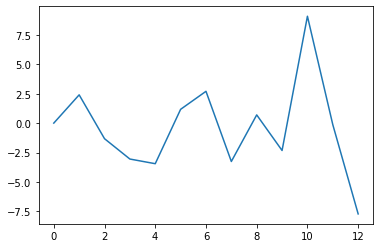

In [11]:
# H5: Imóveis com 3 banheiros têm um crescimento Month over Month (MoM) de 15%;
pd.options.display.float_format = '{:,.2f}'.format
data['date_months'] = data['date'].dt.strftime('%Y-%m')

mom = data[data['bathrooms'] == 3].groupby('date_months', as_index=False)[['price']].mean()

for i in range(len(mom)):
    if i == 0:
        mom.loc[i, 'growth'] = 0
        
    else:
        mom.loc[i, 'growth'] = ((mom.loc[i, 'price'] - mom.loc[i-1, 'price']) / mom.loc[i-1, 'price']) * 100
        
mom

plt.plot(mom['growth'])
display(mom)
plt.show()

In [12]:
# H6: Imóveis com reformas são em média 40% mais caros; CORRETO 43% MAIS CAROS

com_reforma = data['price'][data['yr_renovated'] != 0].mean()
sem_reforma = data['price'][data['yr_renovated'] == 0].mean()

variacao = (com_reforma - sem_reforma) / sem_reforma
print(f'Variação percentual: {(variacao*100):.2f}%')

# O preço médio dos imóveis que foram reformados é 43% em relação aos que nunca passaram por processos de renovação. É aconselhável comprar imóveis com condições boas para então reformá-los visando lucro na revenda.

Variação percentual: 43.27%


- <strong>H7</strong>: Imóveis com condição 3 são em média 40% mais caros que os imóveis com condição 1;
- <strong>H8</strong>: Imóveis com até 2 quartos são em média 10% mais baratos;
- <strong>H9</strong>: Imóveis com porão são em média 5% mais caros;
- <strong>H10</strong>: Imóveis são vendidos no verão por um preço médio 15% maior que no inverno.

In [13]:
# H7: Imóveis com condição a partir de 3 são em média 40% mais caros que os imóveis com condição 1; ERRADO 60% MAIS CAROS

cond_3 = data['price'][data['condition'] >= 3].mean()
cond_1 = data['price'][data['condition'] == 1].mean()

variacao = (cond_3 - cond_1) / cond_1
print(f'Variação percentual: {(variacao*100):.2f}%')

# Imóveis com condições acima de 3, ou seja, os imóveis que são considerados "bons" ou melhores, possuem preço médio 60% maiores que aqueles com condições ruins. Portanto, estes imóveis possuem maior valor de mercado.

Variação percentual: 60.43%


In [14]:
# H8: Imóveis com até 2 quartos são em média 30% mais baratos; ERRADO 30% MAIS BARATOS

ate_2_quartos = data['price'][data['bedrooms'] <= 2].mean()
mais_2_quartos = data['price'][data['bedrooms'] > 2].mean()

variacao = (ate_2_quartos - mais_2_quartos) / mais_2_quartos
print(f'Variação percentual: {(variacao*100):.2f}%')

# Os imóveis com menos de 2 quartos são em média 30% mais baratos que aqueles que possuem mais dormitórios. Estes imóveis são boa opção de portfólio com preços mais baixos.

Variação percentual: -29.57%


In [15]:
# H9: Imóveis com porão são em média 5% mais caros; ERRADO 28% MAIS CAROS

preco_com_porao = data['price'][data['sqft_basement'] != 0].mean()
preco_sem_porao = data['price'][data['sqft_basement'] == 0].mean()

variacao = (preco_com_porao - preco_sem_porao) / preco_sem_porao
print(f'Variação percentual: {(variacao*100):.2f}%')

# Imóveis com porão, além de maiores em área total, são também 28% mais caros. Consequentemente, são imóveis mais bem avaliados.

Variação percentual: 27.97%


In [16]:
# H10: Imóveis são vendidos no verão por um preço médio 15% maior que no inverno. ERRADO 3%

inverno = data['price'][data['season'] == 'winter'].mean()
verao = data['price'][data['season'] == 'summer'].mean()

variacao = (verao - inverno) / inverno
print(f'Variação percentual: {(variacao*100):.2f}%')

# A variação entre os preços médios dos imóveis vendidos no verão e no inverno é de apenas 3%. Ou seja, não há variação significativa entre os preços nas duas estações.

Variação percentual: 3.26%


In [17]:
data_venda.columns

Index(['id', 'zipcode', 'season', 'price', 'price_median', 'condition',
       'condition_description', 'status', 'sell_price', 'gain'],
      dtype='object')

In [18]:
data_venda[['price', 'sell_price', 'gain']].sum()

price        1,522,626,895.00
sell_price   1,959,734,476.70
gain           437,107,581.70
dtype: float64

In [17]:
data_venda = data_venda.sort_values('gain', ascending=False)

for i in range(len(data_venda)):
    if i == 0:
        data_venda.loc[i, 'gain_cumulative'] = data_venda.loc[i, 'gain']
    else:
        data_venda.loc[i, 'gain_cumulative'] = data_venda.loc[i - 1, 'gain_cumulative'] + data_venda.loc[i, 'gain']
        
data_venda

,id,zipcode,season,price,price_median,condition,condition_description,status,sell_price,gain,gain_cumulative
3859,3738000070,98039,winter,"1,712,750.0000","1,865,000.0000",5,excellent,Buy,"2,226,575.0000","513,825.0000","433,093,931.7000"
3870,3025300250,98039,spring,"1,620,000.0000","1,800,000.0000",4,good,Buy,"2,106,000.0000","486,000.0000","436,919,581.7000"
3863,3262300235,98039,fall,"1,555,000.0000","1,880,000.0000",4,good,Buy,"2,021,500.0000","466,500.0000","434,273,431.7000"
3866,2525049246,98039,fall,"1,550,000.0000","1,880,000.0000",4,good,Buy,"2,015,000.0000","465,000.0000","435,297,931.7000"
3867,3025300225,98039,fall,"1,450,000.0000","1,880,000.0000",4,good,Buy,"1,885,000.0000","435,000.0000","435,732,931.7000"
...,...,...,...,...,...,...,...,...,...,...,...
1566,1311000600,98001,fall,"250,000.0000","250,000.0000",5,excellent,Buy,"275,000.0000","25,000.0000","178,596,818.6000"
2951,3832500230,98032,winter,"245,000.0000","243,000.0000",4,good,Buy,"269,500.0000","24,500.0000","328,133,462.8000"
740,9499200220,98002,spring,"234,000.0000","233,301.5000",5,excellent,Buy,"257,400.0000","23,400.0000","75,611,414.5000"
758,7140600190,98002,summer,"233,500.0000","230,000.0000",4,good,Buy,"256,850.0000","23,350.0000","76,605,414.5000"


In [18]:
437107581.70 * 0.8

349686065.36

In [19]:
data_venda[data_venda['gain_cumulative'] >= 349686065.36]

,id,zipcode,season,price,price_median,condition,condition_description,status,sell_price,gain,gain_cumulative
3859,3738000070,98039,winter,"1,712,750.0000","1,865,000.0000",5,excellent,Buy,"2,226,575.0000","513,825.0000","433,093,931.7000"
3870,3025300250,98039,spring,"1,620,000.0000","1,800,000.0000",4,good,Buy,"2,106,000.0000","486,000.0000","436,919,581.7000"
3863,3262300235,98039,fall,"1,555,000.0000","1,880,000.0000",4,good,Buy,"2,021,500.0000","466,500.0000","434,273,431.7000"
3866,2525049246,98039,fall,"1,550,000.0000","1,880,000.0000",4,good,Buy,"2,015,000.0000","465,000.0000","435,297,931.7000"
3867,3025300225,98039,fall,"1,450,000.0000","1,880,000.0000",4,good,Buy,"1,885,000.0000","435,000.0000","435,732,931.7000"
...,...,...,...,...,...,...,...,...,...,...,...
3652,5412200180,98031,winter,"285,000.0000","279,000.0000",4,good,Buy,"313,500.0000","28,500.0000","414,902,537.9000"
3681,3831200210,98031,summer,"280,000.0000","277,500.0000",4,good,Buy,"308,000.0000","28,000.0000","416,886,824.9000"
3655,8078550610,98031,winter,"279,000.0000","279,000.0000",4,good,Buy,"306,900.0000","27,900.0000","415,023,437.9000"
3347,2520069100,98022,fall,"275,000.0000","273,500.0000",4,good,Buy,"302,500.0000","27,500.0000","381,777,301.5000"
